# Lesson 3: In-Class Demo

## Normality Demo
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-21.html

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns  # Plots!
import matplotlib.pyplot as plt

# Set the default figure size for plotting
sns.mpl.rc("figure", figsize=(18,13)) # larger default plots
sns.set_context("notebook", font_scale=2) # larger fonts

%matplotlib inline 
# allows plotting within jupyter notebook, otherwise may open in child windows

In [8]:
mtcars = pd.read_csv("/Users/antuanweeks/PythonCode/GA_DataScience/lesson_4/mtcars.csv")
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [204]:
mtcars.mean()
mtcars.median()
mtcars.quantile(0.5)
mtcars.mode()
mtcars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

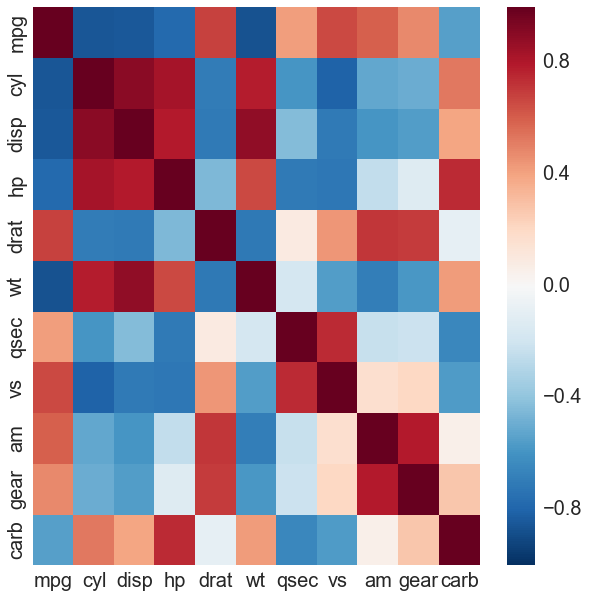

In [13]:
plt.figure(figsize=(10, 10))

sns.heatmap(mtcars.corr())

In [191]:
mtcars[['cyl', 'mpg']].sort_values(by="mpg").head(10)

,cyl,mpg
15,8,10.4
14,8,10.4
23,8,13.3
6,8,14.3
16,8,14.7
30,8,15.0
13,8,15.2
22,8,15.2
21,8,15.5
28,8,15.8


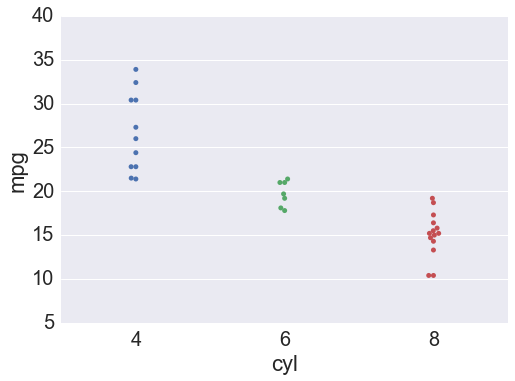

In [212]:
# To change size:

plt = sns.swarmplot("cyl", "mpg", data=mtcars);

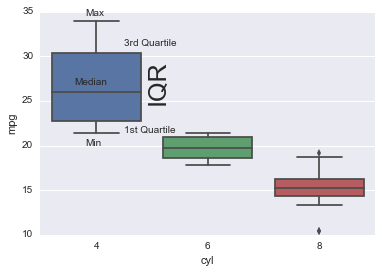

In [193]:
plt = sns.boxplot("cyl", "mpg", data=mtcars)
plt.text(x=0.25, y=31.25, s="3rd Quartile")
plt.text(x=-.2, y=26.75, s="Median")
plt.text(x=0.25, y=21.5, s="1st Quartile")
plt.text(x=-0.1, y=20, s="Min")
plt.text(x=-0.1, y=34.5, s="Max")
plt.text(x=0.45, y=27.5, s="IQR", rotation=90, size=25);

## Analyzing Distributions

Although the mean and median both give us some sense of the center of a distribution, they aren't always the same. The *median* gives us a value that **splits the data into two halves** while the *mean* is a **numeric average,** so extreme values can have a significant impact on the mean. 

In a symmetric distribution, the mean and median will be the same. Let's investigate with a density plot:

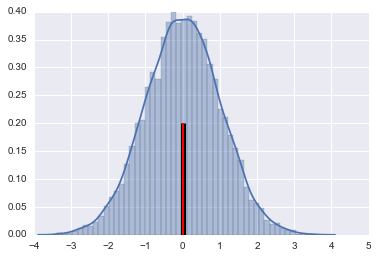

In [194]:
norm_data = pd.DataFrame(np.random.normal(size=10000))

plt = sns.distplot(norm_data)

# Plot black line at mean
plt.vlines(norm_data.mean(), ymin=0, ymax=0.2, linewidth=5.0)

# Plot red line at median
plt.vlines(norm_data.median(), ymin=0, ymax=0.2, linewidth=2.0, color="red");

In the plot above, the mean and median are both so close to zero that the red median line lies on top of the thicker black line drawn at the mean. 

In skewed distributions, the mean tends to get pulled in the direction of the skew, while the median tends to resist the effects of skew:
 

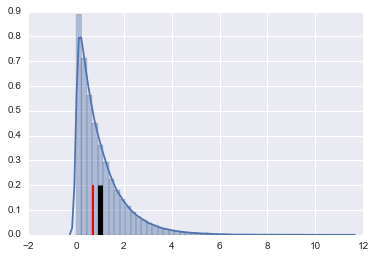

In [195]:
skewed_data = pd.DataFrame(np.random.exponential(size=100000))

plt = sns.distplot(skewed_data)

# Plot black line at mean
plt.vlines(skewed_data.mean(), ymin=0, ymax=0.2, linewidth=5.0)

# Plot red line at median
plt.vlines(skewed_data.median(), ymin=0, ymax=0.2, linewidth=2.0, color="red");

In [17]:
plt.vlines?

Notice that the mean is also influenced heavily by outliers, while the median resists the influence of outliers:

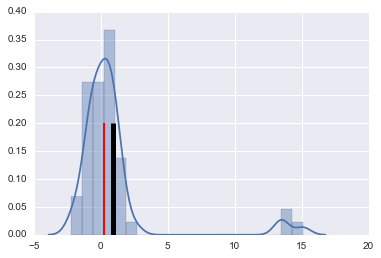

In [196]:
norm_data = np.random.normal(size=50)
outliers = np.random.normal(15, size=3)
combined_data = pd.DataFrame(np.concatenate((norm_data, outliers), axis=0))

plt = sns.distplot(combined_data)

# Plot black line at mean
plt.vlines(combined_data.mean(), ymin=0, ymax=0.2, linewidth=5.0)

# Plot red line at median
plt.vlines(combined_data.median(), ymin=0, ymax=0.2, linewidth=2.0, color="red");

Since the median tends to resist the effects of skewness and outliers, it is known a "robust" statistic. 

The median generally gives a better sense of the typical value in a distribution with significant skew or outliers.

In [197]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)

df1 = pd.Series(comp1)
df2 = pd.Series(comp2)

### Skewness and Kurtosis
*Skewness* measures the **skew or asymmetry of a distribution** while *Kurtosis* measures the **"peakedness" of a distribution**. 

We won't go into the exact calculations behind these, but they are essentially just statistics that take the idea of variance a step further: while variance involves squaring deviations from the mean, skewness involves cubing deviations from the mean, and kurtosis involves raising deviations from the mean to the 4th power.

Pandas has built in functions for checking skewness and kurtosis, df.skew() and df.kurt() respectively:

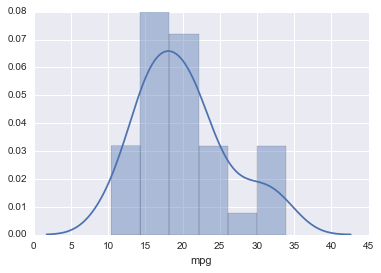

In [198]:
sns.distplot(mtcars["mpg"]);

In [199]:
mtcars["mpg"].skew()  # Check skewness

0.67237713762908047

In [200]:
mtcars["mpg"].kurt()  # Check kurtosis

-0.0220062914240855

As we can see from the output, the normally distributed data has a kurtosis near zero, the flat distribution has negative kurtosis, and the two pointier distributions have positive kurtosis.

### Post-class exercises

**Important**
- Review notebook in the `post-class-exercise` folder: [Exploratory Data Analysis on Shelter Animal Outcomes](../post-class-exercise/04-shelter-animal-outcomes.ipynb)

**Additional Tutorials:**
- http://chrisalbon.com/python/pandas_with_seaborn.html
- https://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html
- https://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical.html